----------------------------------------------------------------------------------------------------------------------

# Exploratory Data Analysis

----------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
color = sns.color_palette()
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)

## Data importing and profiling

In [2]:
df = pd.read_csv("train_master.csv")
df_test = pd.read_csv("test_master.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
df_test.shape

(1459, 80)

In [5]:
df_cat = df.select_dtypes(include="object")
df_num = df.select_dtypes(exclude="object")

In [6]:
df_cat.shape

(1460, 43)

In [7]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

In [8]:
df_cat.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [9]:
df_num.shape

(1460, 38)

In [10]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [11]:
df_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
n1,m1 = df_cat.shape
n2,m2 = df_num.shape

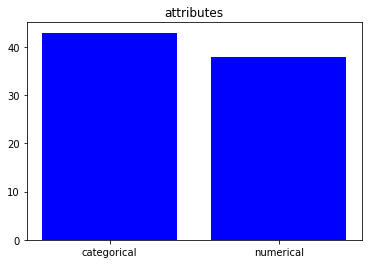

In [14]:
objects = ("categorical", "numerical")
bar = np.arange(len(objects))

values = [m1,m2]

plt.bar(bar, values, align='center', color ="b")
plt.xticks(bar, objects)
plt.title('attributes')
plt.show()

## Output variable analysis

In [19]:
df.SalePrice.values

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [20]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

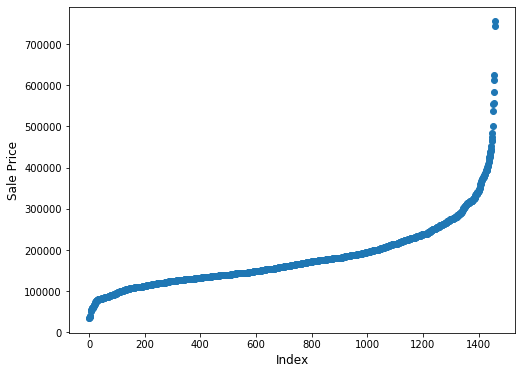

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.SalePrice.values))
plt.xlabel("Index", fontsize = 12)
plt.ylabel("Sale Price", fontsize = 12)
plt.show()

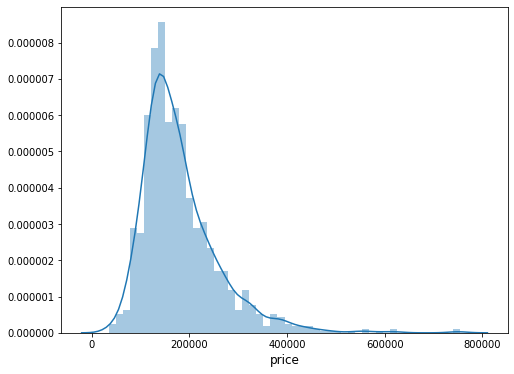

In [22]:
plt.figure(figsize = (8,6))
sns.distplot(df.SalePrice.values, bins = 50, kde = True)
plt.xlabel("price", fontsize = 12)
plt.show()

### Logarithmic transformation (the goal is to get normal distribution)

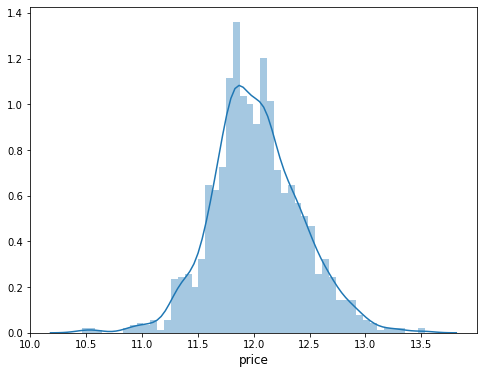

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(np.log1p(df.SalePrice.values), bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [24]:
df['SalePrice_log'] = np.log1p(df['SalePrice'])

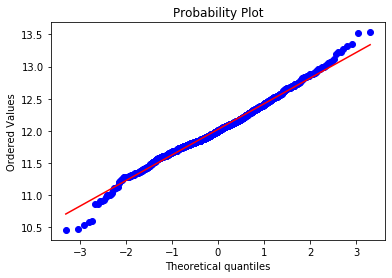

In [25]:
from scipy import stats
res = stats.probplot(df['SalePrice_log'], plot=plt)

In [26]:
df['SalePrice_log'].head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice_log, dtype: float64

In [27]:
df.shape

(1460, 82)

## Missing values

[Text(0, 0.5, '% of missing values'),
 Text(0.5, 1.0, 'The percentage of missing velues per attribute')]

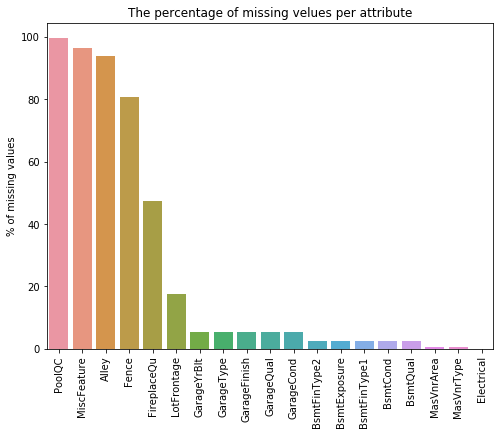

In [16]:
df_null = (df.isnull().sum() / len(df)) * 100
df_null = df_null.drop(df_null[df_null == 0].index).sort_values(ascending = False)
f, ax = plt.subplots(figsize=(8,6))
plt.xticks(rotation = '90')
sns.barplot(x = df_null.index, y=df_null)
ax.set(title = "The percentage of missing velues per attribute", ylabel = "% of missing values")

## Attributes Correlation Analysis

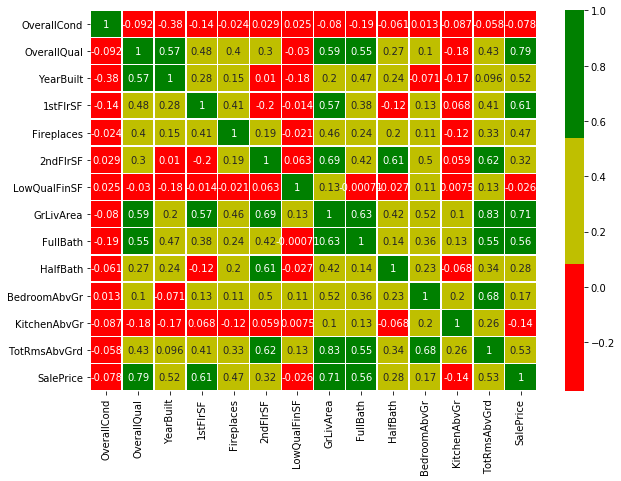

In [30]:
# LIVING AREA CHARACTERISTICS
living_area_characteristics = ["OverallCond", "OverallQual", "YearBuilt", "1stFlrSF", "Fireplaces", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "SalePrice"]
correlation = df[living_area_characteristics].corr()
f, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation="90")
sns.heatmap(correlation, linewidths=.5, annot=True, cmap=["r","y","g"])

### Influence of Ground Living Area on Sales Price

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Square feet'),
 Text(0.5, 1.0, 'Price by above grade living area in sq feet')]

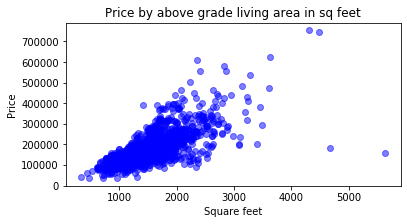

In [31]:
f, ax = plt.subplots(figsize=(6, 3))
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'], c='b', alpha = 0.5)
ax.set(title='Price by above grade living area in sq feet', xlabel='Square feet', ylabel='Price')

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Square feet'),
 Text(0.5, 1.0, 'Price by area in sq feet')]

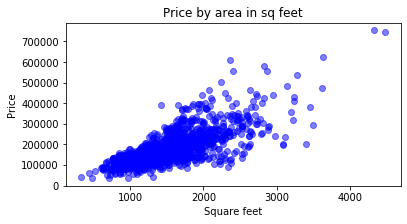

In [32]:
# OUTLIERS REMOVAL
f, ax = plt.subplots(figsize=(6, 3))
outlier1 = df[df['GrLivArea'] > 4500].index
plt.scatter(x=df.drop(outlier1)['GrLivArea'], y=df.drop(outlier1)['SalePrice'], c='b', alpha=0.5)
ax.set(title='Price by area in sq feet', xlabel='Square feet', ylabel='Price')

### Influence of 1st Floor Area (square feet) on Sales Price

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Square feet'),
 Text(0.5, 1.0, 'Price by area in 1st floor sq feet')]

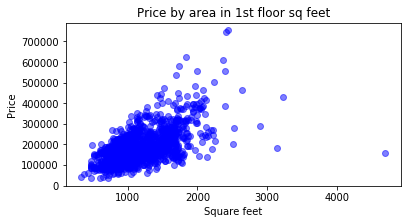

In [33]:
f, ax = plt.subplots(figsize=(6, 3))
plt.scatter(x=df['1stFlrSF'], y=df['SalePrice'], c='b', alpha=0.5)
ax.set(title='Price by area in 1st floor sq feet', xlabel='Square feet', ylabel='Price')

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Square feet'),
 Text(0.5, 1.0, 'Price by area in 1st floor sq feet')]

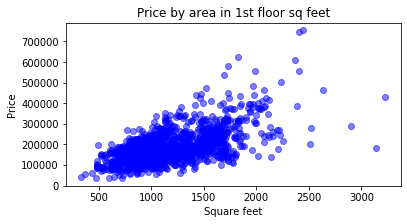

In [34]:
# OUTLIERS REMOVAL
f, ax = plt.subplots(figsize=(6,3))
outlier2 = df[df["1stFlrSF"] > 4000].index
plt.scatter(x=df.drop(outlier2)["1stFlrSF"], y=df.drop(outlier2)["SalePrice"], c='b', alpha = 0.5)
ax.set(title='Price by area in 1st floor sq feet', xlabel='Square feet', ylabel='Price')

### Influence of Number of Bathrooms on Sales Price

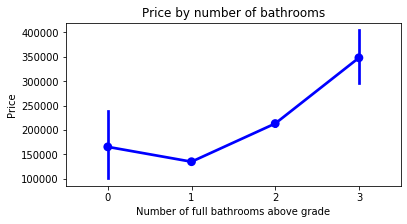

In [35]:
plt.figure(figsize = (6,3))
sns.pointplot(df.FullBath.values, df.SalePrice.values, alpha=0.5, color = "b")
plt.ylabel("Price", fontsize = 10)
plt.xlabel("Number of full bathrooms above grade")
plt.title("Price by number of bathrooms")
plt.show()

### Influence of Year Built on Sales Price

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Price by year built')]

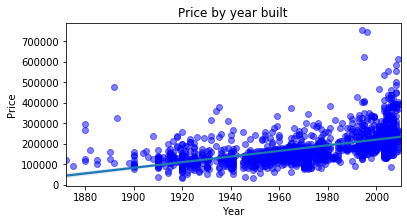

In [36]:
f, ax = plt.subplots(figsize=(6, 3))
plt.scatter(x=df['YearBuilt'], y=df['SalePrice'], c='b', alpha = 0.5)
sns.regplot(x="YearBuilt", y="SalePrice", data=df, scatter=False, truncate=True)
ax.set(title='Price by year built', xlabel='Year', ylabel='Price')

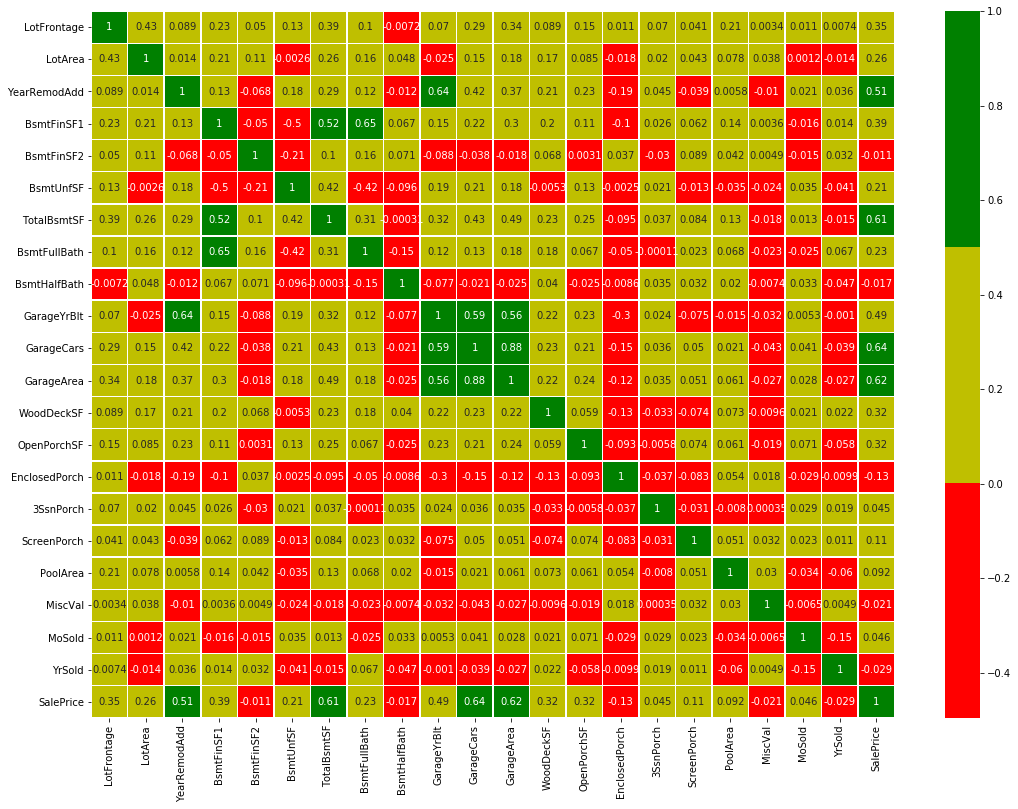

In [37]:
# OTHER CHARACTERISTICS
other_characteristics = ["LotFrontage","LotArea","YearRemodAdd","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageYrBlt","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]
correlation = df[other_characteristics].corr()
f, ax = plt.subplots(figsize=(18,13))
plt.xticks(rotation="90")
sns.heatmap(correlation, linewidths=.5, annot=True, cmap=["r","y","g"])

### Influence of Overall Quality on Sales Price

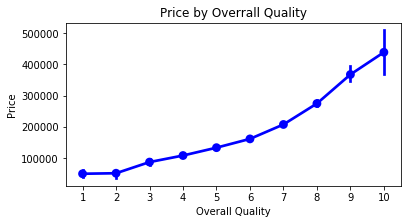

In [38]:
plt.figure(figsize = (6,3))
sns.pointplot(df.OverallQual.values, df.SalePrice.values, alpha=0.5, color = "b")
plt.ylabel("Price", fontsize = 10)
plt.xlabel("Overall Quality")
plt.title("Price by Overrall Quality")
plt.show()

### Influence of Remod Year on Sales Price

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Remodeling year'),
 Text(0.5, 1.0, 'Price by year of remodeling')]

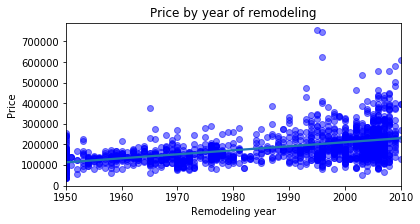

In [39]:
f, ax = plt.subplots(figsize=(6,3))
plt.scatter(x=df["YearRemodAdd"], y = df["SalePrice"], c = "b", alpha = 0.5)
sns.regplot(x="YearRemodAdd", y="SalePrice", data=df, scatter=False, truncate=True)
ax.set(title = "Price by year of remodeling", xlabel = "Remodeling year", ylabel = "Price")

### Influence of Basement area (square feet) on Sales Price

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Square feet'),
 Text(0.5, 1.0, 'Price by basement area')]

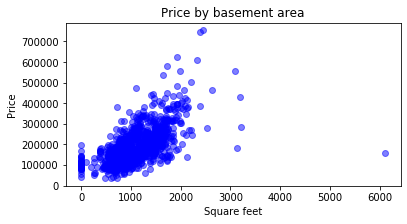

In [40]:
f, ax = plt.subplots(figsize=(6,3))
plt.scatter(x=df["TotalBsmtSF"], y=df["SalePrice"], color = "b", alpha = 0.5)
ax.set(title = "Price by basement area", xlabel = "Square feet", ylabel = "Price")

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Square feet'),
 Text(0.5, 1.0, 'Price by basement area')]

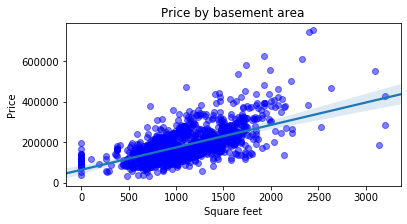

In [41]:
# OUTLIERS REMOVAL
f, ax = plt.subplots(figsize=(6,3))
outlier3 = df[df["TotalBsmtSF"] > 4000].index
plt.scatter(x = df.drop(outlier3)["TotalBsmtSF"], y = df.drop(outlier3)["SalePrice"], c = "b", alpha = 0.5)
sns.regplot(x="TotalBsmtSF", y="SalePrice", data = df, scatter = False, truncate = False)
ax.set(title = "Price by basement area", xlabel = "Square feet", ylabel = "Price" )

### Influence of Garage Size (number of cars) on Sales Price

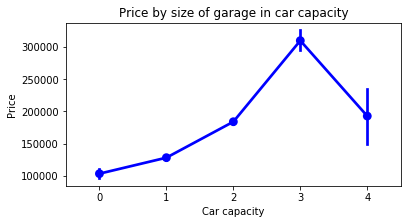

In [42]:
plt.figure(figsize = (6,3))
sns.pointplot(df.GarageCars.values, df.SalePrice.values, alpha=0.5, color = "b")
plt.ylabel("Price", fontsize = 10)
plt.xlabel("Car capacity")
plt.title("Price by size of garage in car capacity")
plt.show()

### Influence of Garage Area (square feet) on Sales Price

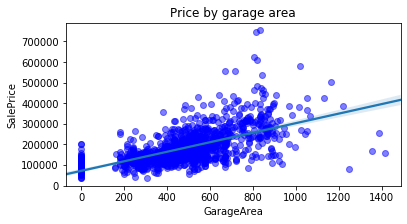

In [43]:
f, ax = plt.subplots(figsize=(6,3))
plt.scatter(x=df["GarageArea"], y=df["SalePrice"], color = "b", alpha = 0.5)
ax.set(title = "Price by garage area", xlabel = "Square feet", ylabel = "Price")
sns.regplot(x="GarageArea", y="SalePrice", data = df, scatter = False, truncate = False)

### Influence of Overall Condition on Sales Price

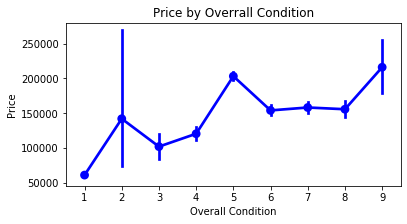

In [44]:
plt.figure(figsize = (6,3))
sns.pointplot(df.OverallCond.values, df.SalePrice.values, alpha=0.5, color = "b")
plt.ylabel("Price", fontsize = 10)
plt.xlabel("Overall Condition")
plt.title("Price by Overrall Condition")
plt.show()

## Feature Importance

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
X_train = df.drop(labels = ['Id'], axis = 1)
y_train = df['SalePrice_log']
X_train = X_train.drop(['SalePrice','SalePrice_log'], axis = 1)


In [46]:
for f in X_train.columns:
    if X_train[f].dtype == 'object':
        lbl = LabelEncoder()
        X_train[f] = lbl.fit_transform(X_train[f].astype(str))
X_train = X_train.fillna(X_train.mean())
X_train = (X_train-X_train.mean())/X_train.std()

In [46]:
rf = RandomForestRegressor(random_state = 0)
rf = rf.fit(X_train,y_train)

In [49]:
fi = list(zip(X_train.columns, rf.feature_importances_))
fi.sort(key = lambda tup: tup[1], reverse = True)
print('RF FEATURE IMPORTANCE')
d = [print('%-40s%s' % (i)) for i in fi[:30]]

RF FEATURE IMPORTANCE
OverallQual                             0.5497052525789204
GrLivArea                               0.10752562067415497
GarageCars                              0.05056308833065408
TotalBsmtSF                             0.04367534779110161
1stFlrSF                                0.03163280388706559
GarageArea                              0.02064759540268647
YearBuilt                               0.01789192305264284
BsmtFinSF1                              0.0137333906086686
GarageType                              0.010059158087923506
LotArea                                 0.009748735073752809
OverallCond                             0.008995742381307773
CentralAir                              0.008289658476729826
LotFrontage                             0.008205826481806181
YearRemodAdd                            0.00792563072353609
2ndFlrSF                                0.006680989162979344
Neighborhood                            0.006315660296743621
FullBath     

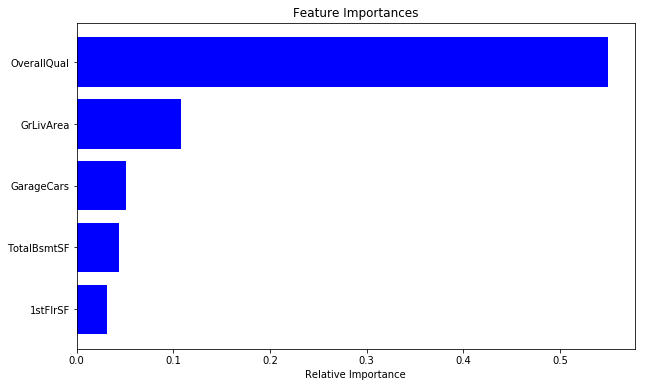

In [51]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices[74:79])), importances[indices[74:79]], color='b', align='center')
plt.yticks(range(len(indices[74:79])), [features[i] for i in indices[74:79]])
plt.xlabel('Relative Importance')
plt.show()

## Importan Features scatterplot

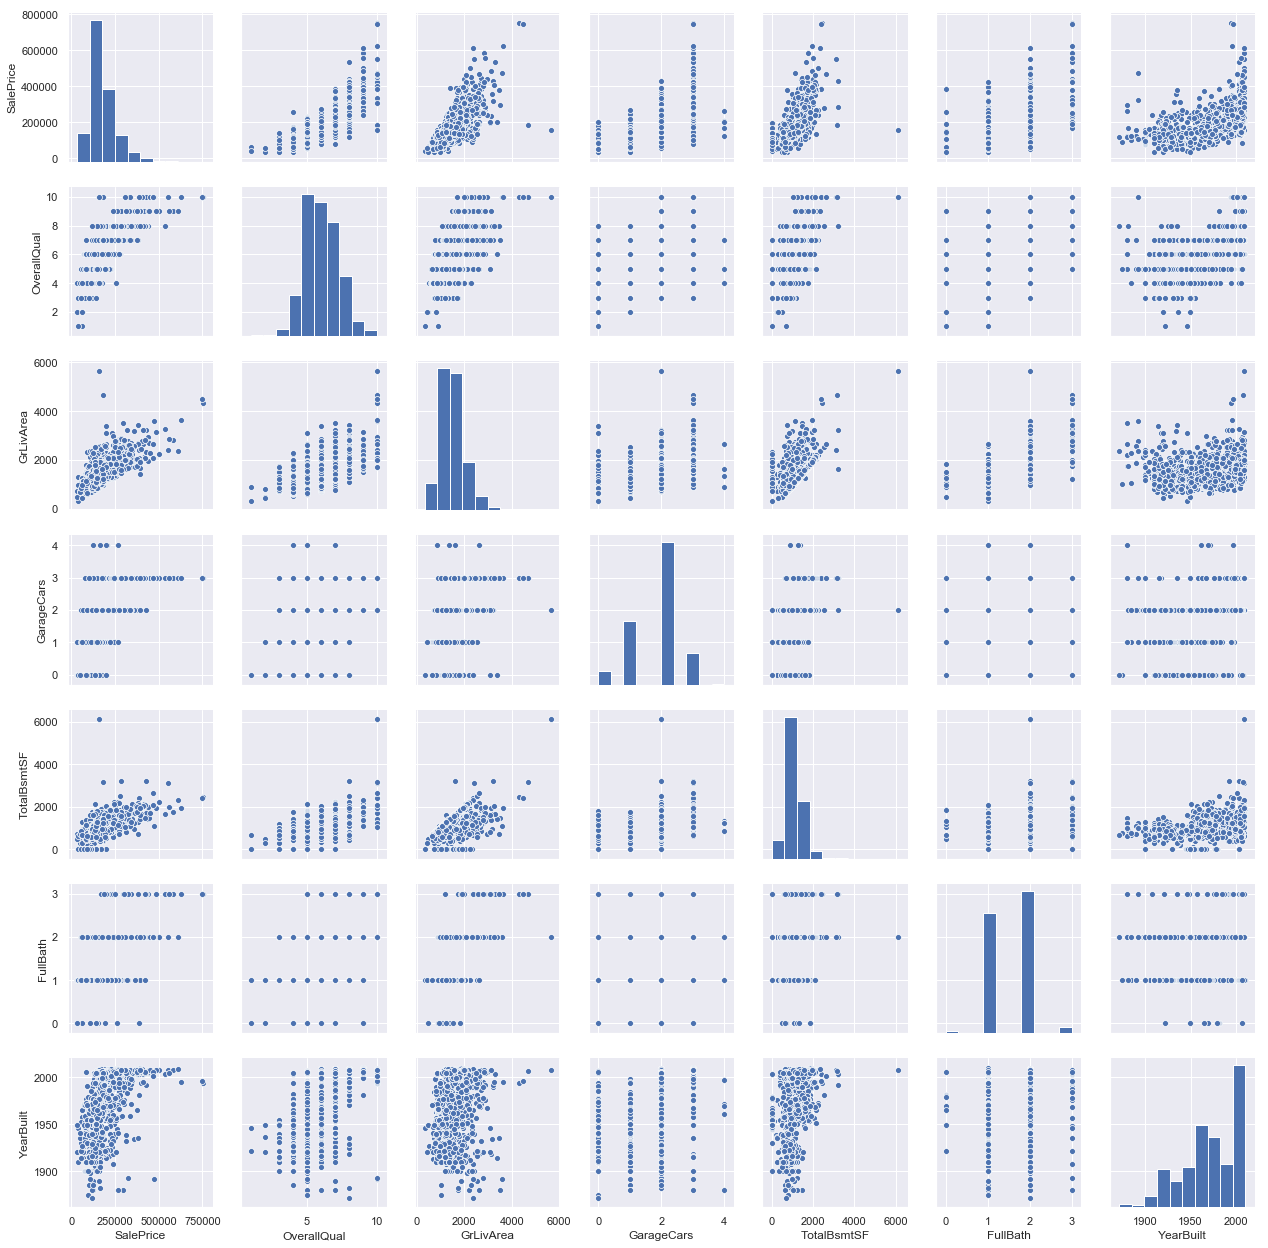

In [52]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();